Description:  This script produces plots (a), (b), and (f) in Figure 1 

#### First, we start with Fig. 1(a) and (b)

In [1]:
from datetime import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib
import metpy.calc as mpcalc
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
import xarray as xr
import Nio
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# set run command parameters for matplotlib plots
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['font.size'] = 15

In [2]:
# load the 18Z NAM data file at 00 forecast hour using xarray

ds = xr.open_dataset('../data/interim/nam_218_20130519_1800_000.grb2',
engine='pynio')

In [3]:
# Grab lat/lon values (NAM will be 2D)
lats = ds.gridlat_0.data
lons = ds.gridlon_0.data

# Select and grab data
hght = ds['HGT_P0_L100_GLC0']  # height coordinate values from model data
uwnd = ds['UGRD_P0_L100_GLC0'] # zonal velocity from model data
vwnd = ds['VGRD_P0_L100_GLC0'] # meridional velocity from model data

# Select and grab 500-hPa geopotential heights and wind components, smooth with gaussian_filter
hght_500 = gaussian_filter(hght.sel(lv_ISBL0=50000).data, sigma=3.0)
uwnd_500 = gaussian_filter(uwnd.sel(lv_ISBL0=50000).data, sigma=3.0) * units('m/s')
vwnd_500 = gaussian_filter(vwnd.sel(lv_ISBL0=50000).data, sigma=3.0) * units('m/s')

# Select and grab 500-hPa geopotential heights and wind components, smooth with gaussian_filter
hght_850 = gaussian_filter(hght.sel(lv_ISBL0=85000).data, sigma=3.0)
uwnd_850 = gaussian_filter(uwnd.sel(lv_ISBL0=85000).data, sigma=3.0) * units('m/s')
vwnd_850 = gaussian_filter(vwnd.sel(lv_ISBL0=85000).data, sigma=3.0) * units('m/s')

# Use MetPy to calculate the wind speed for colorfill plot, change units to knots from m/s
sped_500 = mpcalc.wind_speed(uwnd_500, vwnd_500).to('kt')
sped_850 = mpcalc.wind_speed(uwnd_850, vwnd_850).to('kt')

In [4]:
# Set up the projection that will be used for plotting
mapcrs = ccrs.LambertConformal(central_longitude=-100,
                               central_latitude=35,
                               standard_parallels=(30, 60))

# Set up the projection of the data; if lat/lon then PlateCarree is what you want
datacrs = ccrs.PlateCarree()

#### Plot data at 500 hPa pressure level

/anaconda3/envs/segmentation/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


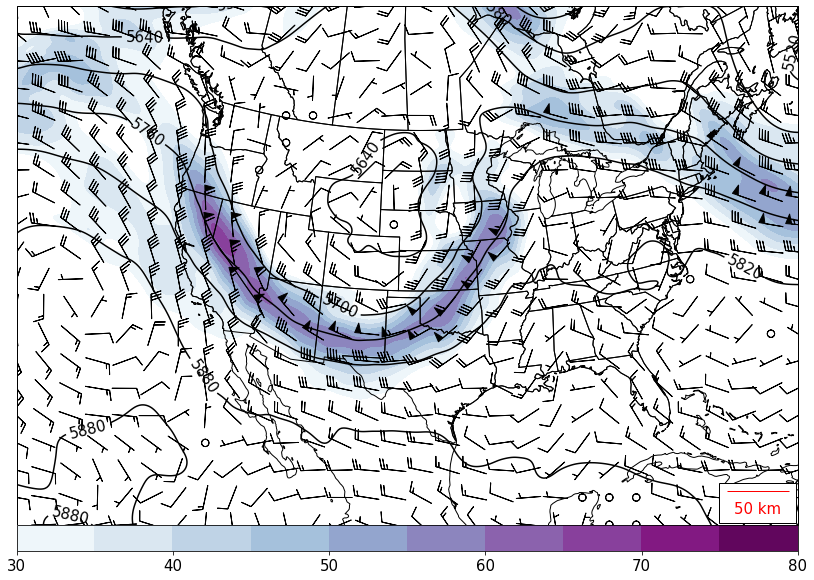

In [5]:
# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([-130, -72, 20, 55], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Plot 500-hPa Colorfill Wind Speeds in knots
clevs_500_sped = np.arange(30, 85, 5)
cf = ax.contourf(lons, lats, sped_500, clevs_500_sped, cmap=plt.cm.BuPu,
                 transform=datacrs)
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=30)

# Plot 500-hPa Geopotential Heights in meters
clevs_500_hght = np.arange(0, 8000, 60)
cs = ax.contour(lons, lats, hght_500, clevs_500_hght, colors='black',
                transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 500-hPa wind barbs in knots, regrid to reduce number of barbs
ax.barbs(lons, lats, uwnd_500.to('kt').m, vwnd_500.to('kt').m, pivot='middle',
         color='black', regrid_shape=20, transform=datacrs)

# Add a map scale bar for reference
scalebar = AnchoredSizeBar(ax.transData,
                           500000, '50 km', 'lower right', 
                           pad=0.5,
                           color='red',
                           frameon=True,
                           size_vertical=0.1,
                           sep = 10)

ax.add_artist(scalebar)

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.tight_layout()
plt.show()

#### Plot data at 850 hPa pressure level

/anaconda3/envs/segmentation/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


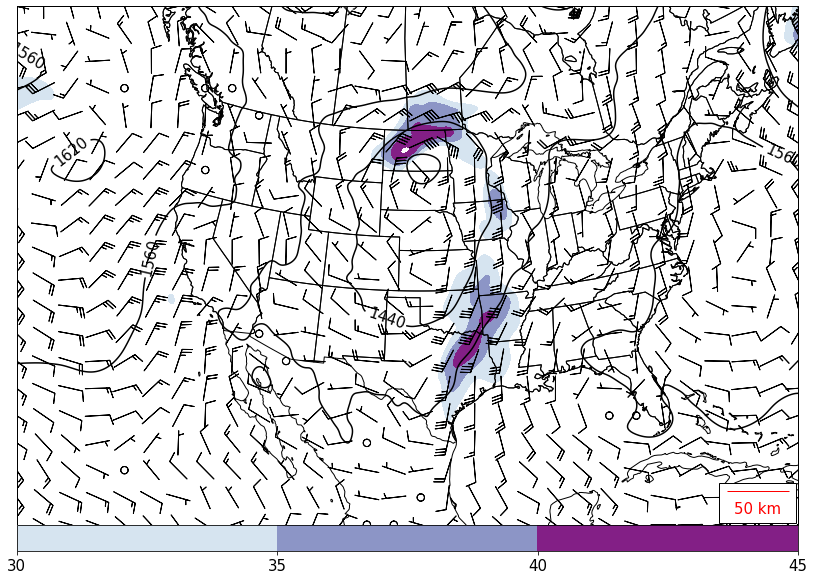

In [6]:
# Start the figure and create plot axes with proper projection
fig = plt.figure(1, figsize=(14, 12))
ax = plt.subplot(111, projection=mapcrs)
ax.set_extent([-130, -72, 20, 55], ccrs.PlateCarree())

# Add geopolitical boundaries for map reference
ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))

# Plot 850-hPa Colorfill Wind Speeds in knots
clevs_850_sped = np.arange(30, 50, 5)
cf = ax.contourf(lons, lats, sped_850, clevs_850_sped, cmap=plt.cm.BuPu,
                 transform=datacrs)
plt.colorbar(cf, orientation='horizontal', pad=0, aspect=30)

# Plot 850-hPa Geopotential Heights in meters
clevs_850_hght = np.arange(0, 8000, 60)
cs = ax.contour(lons, lats, hght_850, clevs_850_hght, colors='black',
                transform=datacrs)
plt.clabel(cs, fmt='%d')

# Plot 850-hPa wind barbs in knots, regrid to reduce number of barbs
ax.barbs(lons, lats, uwnd_850.to('kt').m, vwnd_850.to('kt').m, pivot='middle',
         color='black', regrid_shape=20, transform=datacrs)

# Add a map scale bar for reference
scalebar = AnchoredSizeBar(ax.transData,
                           500000, '50 km', 'lower right', 
                           pad=0.5,
                           color='red',
                           frameon=True,
                           size_vertical=0.1,
                           sep = 10)

ax.add_artist(scalebar)

# Adjust image and show
plt.subplots_adjust(bottom=0, top=1)
plt.tight_layout()
plt.show()

#### Next, we plot Fig. 1(f)

In [7]:
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from siphon.simplewebservice.wyoming import WyomingUpperAir
import os,glob
from datetime import datetime
import metpy.plots as plots

%matplotlib inline

In [8]:
# function to find indices corresponding to the closest value in an array

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [9]:
# MetPy based calculations to retrieve pressure, temperature, dewpoint temperature,
# zonal velcoity, meridional velocity, and a pandas dataframe corresponding to sounding data
def sounding_calc(date,station):
    """
    Retrieve sounding data using siphon module
    
    Arguments: 
        
        date: (datetime object) with Date and Hour of sounding 
        station: (str) sounding station for which Skew-T plot is desired
        
        e.g. sounding_calc(datetime(2013,5,19,12),'OUN')
        
    Returns:
        
        p,T,Td,u,v,df,idx (where idx provides indices of resampled pressure levels to be used for plotting data)
    """
    date = date
    station = station

    df = WyomingUpperAir.request_data(date,station)

    p = df['pressure'].values * units(df.units['pressure'])
    T = df['temperature'].values * units(df.units['temperature'])
    Td = df['dewpoint'].values * units(df.units['dewpoint'])
    u = df['u_wind'].values * units(df.units['u_wind'])
    v = df['v_wind'].values * units(df.units['v_wind'])
    wind_speed = df['speed'].values * units.knots

    mask = p >= 100 *units.hPa

    interval = np.arange(100,1000,50) * units.hPa
    idx = mpcalc.resample_nn_1d(p,interval)

    interval = np.logspace(2,3) * units.hPa
    idx = mpcalc.resample_nn_1d(p,interval)
    
    return p,T,Td,u,v,df,idx

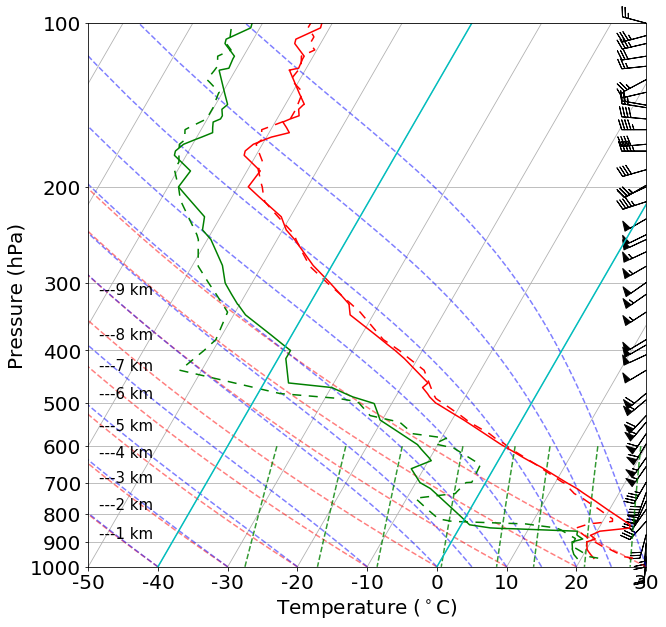

In [10]:
date1 = datetime(2013,5,19,12)
station1 = 'OUN'

date2 = datetime(2013,5,19,18)
station2 = 'OUN'

p1,T1,Td1,u1,v1,df1,idx1 = sounding_calc(date1,station1)
p2,T2,Td2,u2,v2,df2,idx2 = sounding_calc(date2,station2)


fig = plt.figure(figsize=(10,10))
skew = plots.SkewT(fig)

#plot temperature profile
skew.plot(p1,T1,'r',label='T profile 12 UTC')
skew.plot(p2,T2,'r',linestyle=(0, (6, 5)),label='T profile 18 UTC')  # 18Z sounding profile in dashed marker

#plot dewpoint temperature profile
skew.plot(p1,Td1,'g',label='Td profile 12 UTC')
skew.plot(p2,Td2,'g',linestyle=(0, (6, 5)),label='Td profile 18 UTC') # 18Z sounding profile in dashed marker

#set plot limits
skew.ax.set_ylim(1000,100)
skew.ax.set_xlim(-50,30)

#plot wind barbs on the side 
skew.plot_barbs(p2[idx2],u2[idx2],v2[idx2]) #plotting winds for the later (close to storm) time

#plot dry, moist adiabats, and lines of constant mixing ratio
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

#Highlight 0 and -40 deg isotherms in cyan color (electrification region/cold cloud processes)
skew.ax.axvline(0 * units.degC, color='c')
skew.ax.axvline(-40 * units.degC, color='c')

#set x and y axes labels as well as ticklabels
skew.ax.set_xlabel('Temperature ($^\circ$C)',fontsize=20)
skew.ax.set_ylabel('Pressure (hPa)',fontsize=20)
skew.ax.set_xticklabels(labels=np.arange(-100,40,10),fontsize=20)
skew.ax.set_yticklabels(labels=np.arange(0,1100,100),fontsize=20)

#set plot title
# skew.ax.set_title('Skew-T plot for 18 UTC OUN sounding on 19 May 2013',fontsize=18,pad=20)

# Now, we also want to plot approximate heights AGL

heights = df2['height']/1000. #plotting heights for the later (close to storm) time
hght_plt = np.array([1,2,3,4,5,6,7,8,9]) #plot heights starting at 1 km at an interval of 1 km uptil 9 km AGL
indices = []
for i in hght_plt:
    tmp = find_nearest(heights,i)
    indices.append(tmp)
pres_plt = df2['pressure'][indices]
pressure_plt = np.asarray(pres_plt) * units.millibar
hght = hght_plt * units.km

for height_tick, p_tick in zip(hght, pressure_plt):
    trans, _, _ = skew.ax.get_yaxis_text1_transform(0)
    skew.ax.text(0.02, p_tick, '---{:~d}'.format(height_tick), transform=trans,fontsize=15)

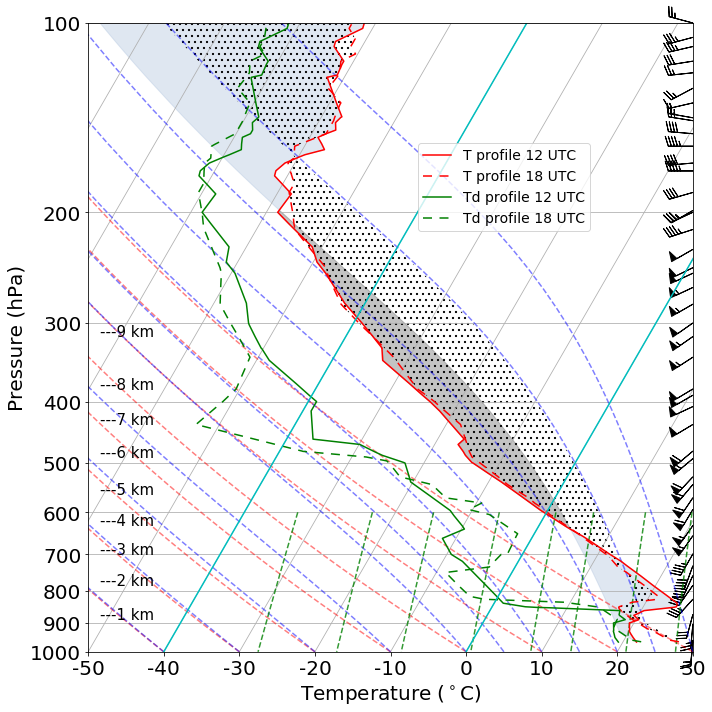

In [11]:
# Improve visualization of the previous plot to enable clear overlay
# of 12 UTC and 18 UTC sounding profiles. Hatch 18 UTC CAPE and CIN,
# 12 UTC CAPE and CIN are shaded.

parcel_path1 = mpcalc.parcel_profile(p1,T1[0],Td1[0])
skew.shade_cape(p1,T1,parcel_path1,color='dimgrey',alpha=0.4)
skew.shade_cin(p1,T1,parcel_path1,color='lightsteelblue',alpha=0.4)

parcel_path2 = mpcalc.parcel_profile(p2,T2[0],Td2[0])
skew.shade_cape(p2,T2,parcel_path2,color=None,hatch=2*'.',alpha=0)
skew.shade_cin(p2,T2,parcel_path2,color=None,hatch=2*'.',alpha=0)
fig.legend(loc=9,bbox_to_anchor=(0.70,0.8),fontsize=14)
fig.tight_layout()
fig